H.K.D.R. Atapattu

# Adult Income Dataset Analysis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data set
col_name = ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income']

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
           ,names=col_name)

### Identifying the nature of data set

In [3]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
dataset.shape

(32561, 15)

In [6]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [7]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Handling missing values 

In [77]:
# Identifying missing values
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
dataset.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [11]:
dataset = dataset.replace(' ?',np.nan)

In [12]:
dataset.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Missing values are only in categorical data, hence replacing missing values with modes.

In [78]:
#replacing missing values with modes
dataset['native-country'].fillna(dataset['native-country'].mode()[0],inplace = True)

dataset['workclass'].fillna(dataset['workclass'].mode()[0],inplace = True)

dataset['occupation'].fillna(dataset['occupation'].mode()[0],inplace = True)

In [79]:
# After removing missing data
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Exploratory data analysis

# Univariate Analysis

## Numerical Data Analysis

### 1) Age Distribution

Text(0.5, 0, 'age')

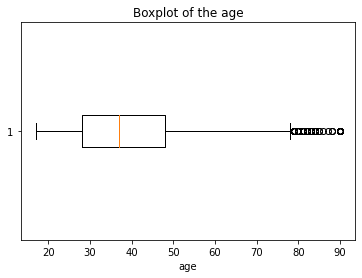

In [15]:
# To check outliers
plt.boxplot(dataset['age'], vert=False)
plt.title("Boxplot of the age")
plt.xlabel("age")

There're outliers for "Age"

<function matplotlib.pyplot.show(close=None, block=None)>

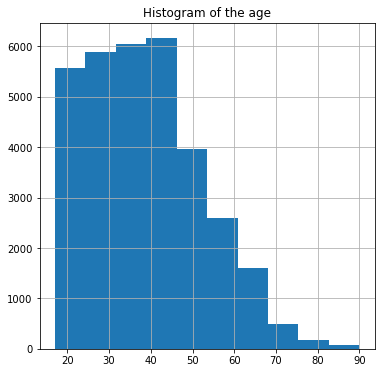

In [16]:
#Nature of distribution
dataset['age'].hist(figsize = (6,6))
plt.title("Histogram of the age")
plt.show

In [17]:
dataset['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

This graph shows the Age distribution of the adults. Distribution is a right skewed distribution with mean 39 years and median 37 years.

### 2) fnlwgt Distribution

Text(0.5, 0, 'fnlwgt')

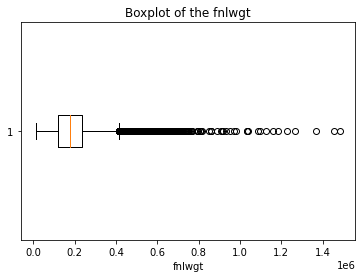

In [18]:
# To check outliers
plt.boxplot(dataset['fnlwgt'], vert=False)
plt.title("Boxplot of the fnlwgt")
plt.xlabel("fnlwgt")

There're outliers for "fnlwgt"

<function matplotlib.pyplot.show(close=None, block=None)>

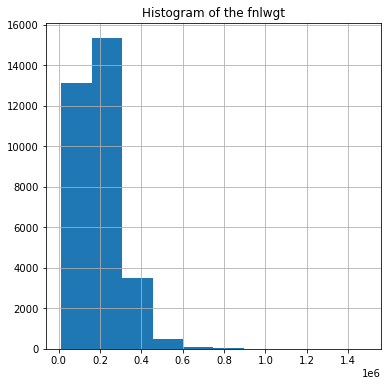

In [80]:
#Nature of distribution
dataset['fnlwgt'].hist(figsize = (6,6))
plt.title("Histogram of the fnlwgt")
plt.show

In [20]:
dataset['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

This graph shows the fnlwgt distribution of the adults. Distribution is a right skewed distribution with mean 1.9 and median 1.8.

### 3) Education-num Distribution

Text(0.5, 0, 'education-num')

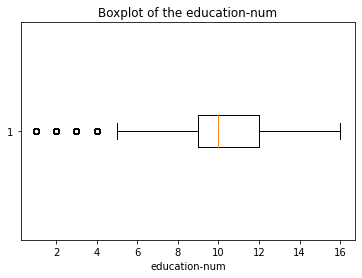

In [21]:
# To check outliers
plt.boxplot(dataset['education-num'], vert=False)
plt.title("Boxplot of the education-num")
plt.xlabel("education-num")

There're outliers for education-num

<function matplotlib.pyplot.show(close=None, block=None)>

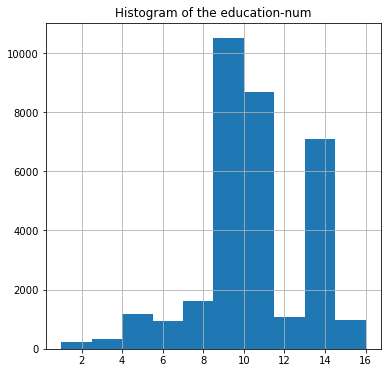

In [81]:
#Nature of distribution
dataset['education-num'].hist(figsize = (6,6))
plt.title("Histogram of the education-num")
plt.show

In [23]:
dataset['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

This graph shows the education-num distribution of the adults. Distribution is a left skewed with mean and median 10.

### 4) capital-gain distribution

Text(0.5, 0, 'capital-gain')

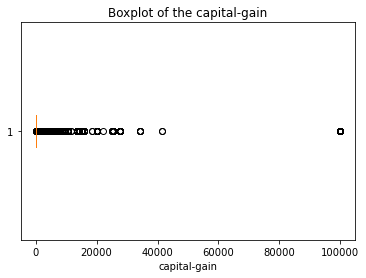

In [24]:
# To check outliers
plt.boxplot(dataset['capital-gain'], vert=False)
plt.title("Boxplot of the capital-gain")
plt.xlabel("capital-gain")

There're outliers for capital-gain

<function matplotlib.pyplot.show(close=None, block=None)>

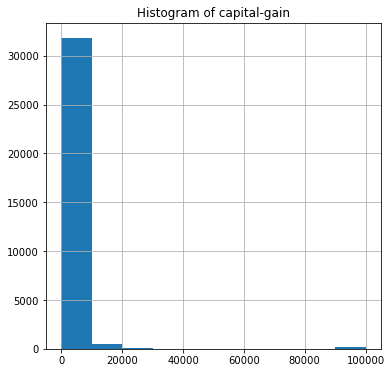

In [82]:
#Nature of distribution
dataset['capital-gain'].hist(figsize = (6,6))
plt.title("Histogram of capital-gain")
plt.show

In [26]:
dataset['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

This graph shows the capital-gain distribution of the adults. Distribution is a left skewed with mean 1078.

### 5) capital-loss distribution

Text(0.5, 0, 'capital-loss')

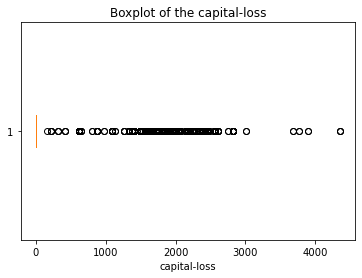

In [27]:
plt.boxplot(dataset['capital-loss'], vert=False)
plt.title("Boxplot of the capital-loss")
plt.xlabel("capital-loss")

There're outliers for capital-loss

<function matplotlib.pyplot.show(close=None, block=None)>

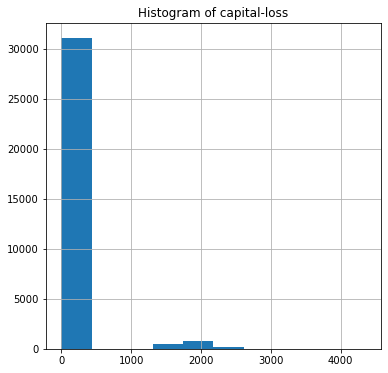

In [83]:
#Nature of distribution
dataset['capital-loss'].hist(figsize = (6,6))
plt.title("Histogram of capital-loss")
plt.show

In [29]:
dataset['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

### 6) hours-per-week distribution

Text(0.5, 0, 'hours-per-week')

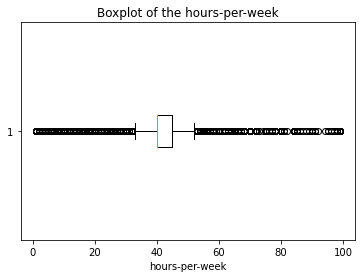

In [30]:
# To check outliers
plt.boxplot(dataset['hours-per-week'], vert=False)
plt.title("Boxplot of the hours-per-week")
plt.xlabel("hours-per-week")

There're outliers for hours-per-week

<function matplotlib.pyplot.show(close=None, block=None)>

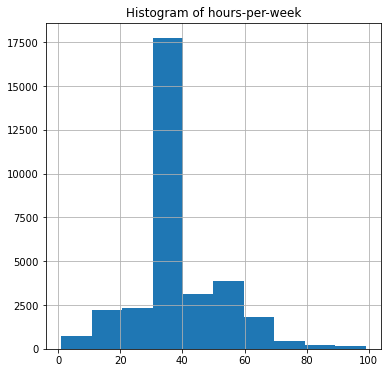

In [84]:
#Nature of distribution
dataset['hours-per-week'].hist(figsize = (6,6))
plt.title("Histogram of hours-per-week")
plt.show

In [32]:
dataset['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

## Categorical Data Analysis

### 1) Workclass distribution

In [33]:
dataset['workclass'].describe()

count        32561
unique           8
top        Private
freq         24532
Name: workclass, dtype: object

In [34]:
dataset['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:>

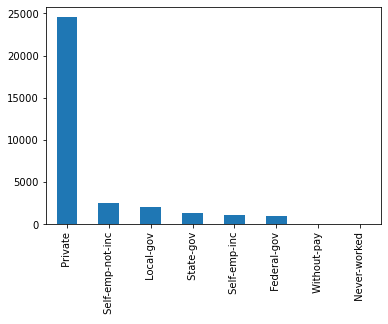

In [35]:
dataset['workclass'].value_counts().plot(kind='bar')

According to the above graph, there are 9 workplace categoires in this dataset.Out of those workplaces, most of adults working in private sector while only few Never worked.

### 2) Marital-status distribution

In [36]:
dataset['marital-status'].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital-status, dtype: object

In [37]:
dataset['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

<AxesSubplot:>

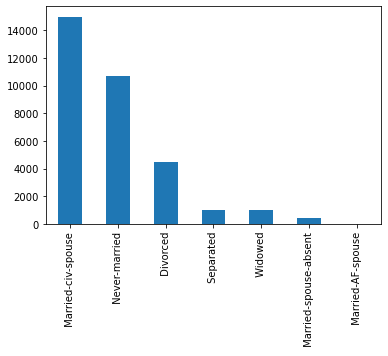

In [38]:
dataset['marital-status'].value_counts().plot(kind='bar')

According to the above graph, there are 7 marital status categoires in this dataset.Out of those marital status, most of adults are in Married-civ-spouse while only few are Married-AF-spouse.

### 3) Occupation distribution

In [39]:
dataset['occupation'].describe()

count               32561
unique                 14
top        Prof-specialty
freq                 5983
Name: occupation, dtype: object

In [40]:
dataset['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:>

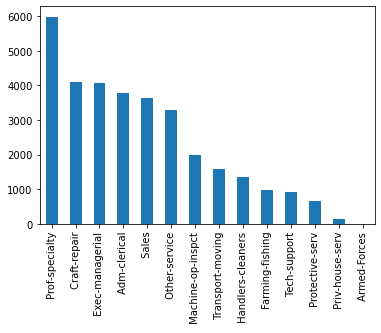

In [41]:
dataset['occupation'].value_counts().plot(kind='bar')

According to the above graph, there are 14 occupation categoires in this dataset.Out of those occupations, most of adults working as Prof-specialty while only few working in Armed-Forces.

### 4) Relationship distribution

In [42]:
dataset['relationship'].describe()

count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object

In [43]:
dataset['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

<AxesSubplot:>

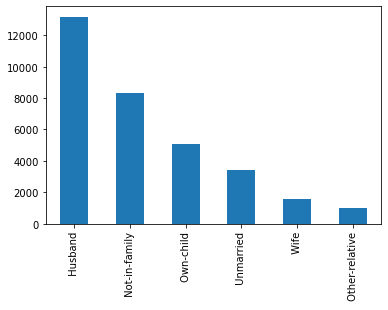

In [44]:
dataset['relationship'].value_counts().plot(kind='bar')

According to the above graph, there are 6 relationships categoires in this dataset.Out of those relationships, most of adults have relationship as Husband while only few have relationship as Other-relative.

### 5) Race distribution

In [45]:
dataset['race'].describe()

count      32561
unique         5
top        White
freq       27816
Name: race, dtype: object

In [46]:
dataset['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

<AxesSubplot:>

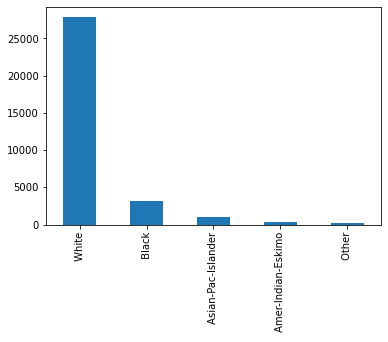

In [47]:
dataset['race'].value_counts().plot(kind='bar')

According to the above graph, there are 5 race categoires in this dataset.Out of those races, most of adults' race is white while only few adults' race is other.

### 6) Sex distribution

In [48]:
dataset['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

In [85]:
dataset['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

<AxesSubplot:>

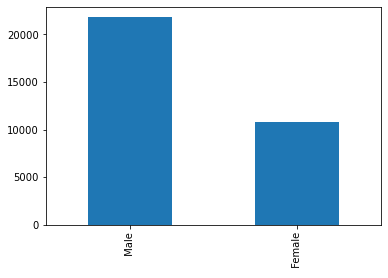

In [50]:
dataset['sex'].value_counts().plot(kind='bar')

According to the above graph, there are 2 gender categoires in this dataset.Out of those genders, most of adults' sex is male while only few adults' sex is female.

### 7) Native-country distribution

In [51]:
dataset['native-country'].describe()

count              32561
unique                41
top        United-States
freq               29753
Name: native-country, dtype: object

In [52]:
dataset['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:>

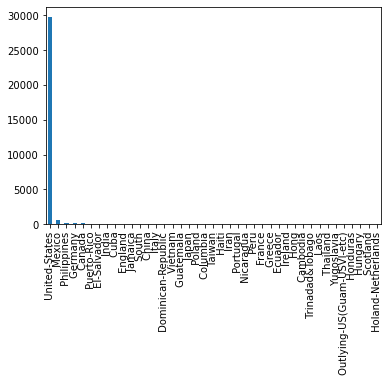

In [53]:
dataset['native-country'].value_counts().plot(kind='bar')

According to the above graph, there are 41 native country categoires in this dataset.Out of those countries, most of adults are from United-States while only one adult is from Holand-Netherlands.

### 8) Income distribution

In [54]:
dataset['income'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: income, dtype: object

In [55]:
dataset['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

<AxesSubplot:>

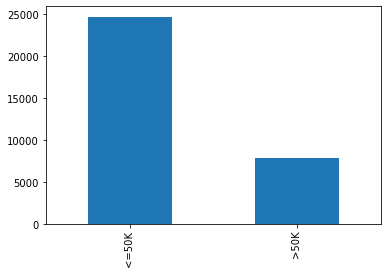

In [56]:
dataset['income'].value_counts().plot(kind='bar')

According to the above graph, there are only two income categoires in this dataset.Out of those categoires, most of adults have less than or equal 50k while only few adults have more than 50k.

# Bivariate analysis

## Two numerical variables 

<AxesSubplot:>

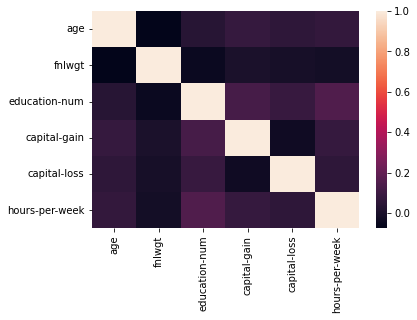

In [86]:
sns.heatmap(dataset.corr())

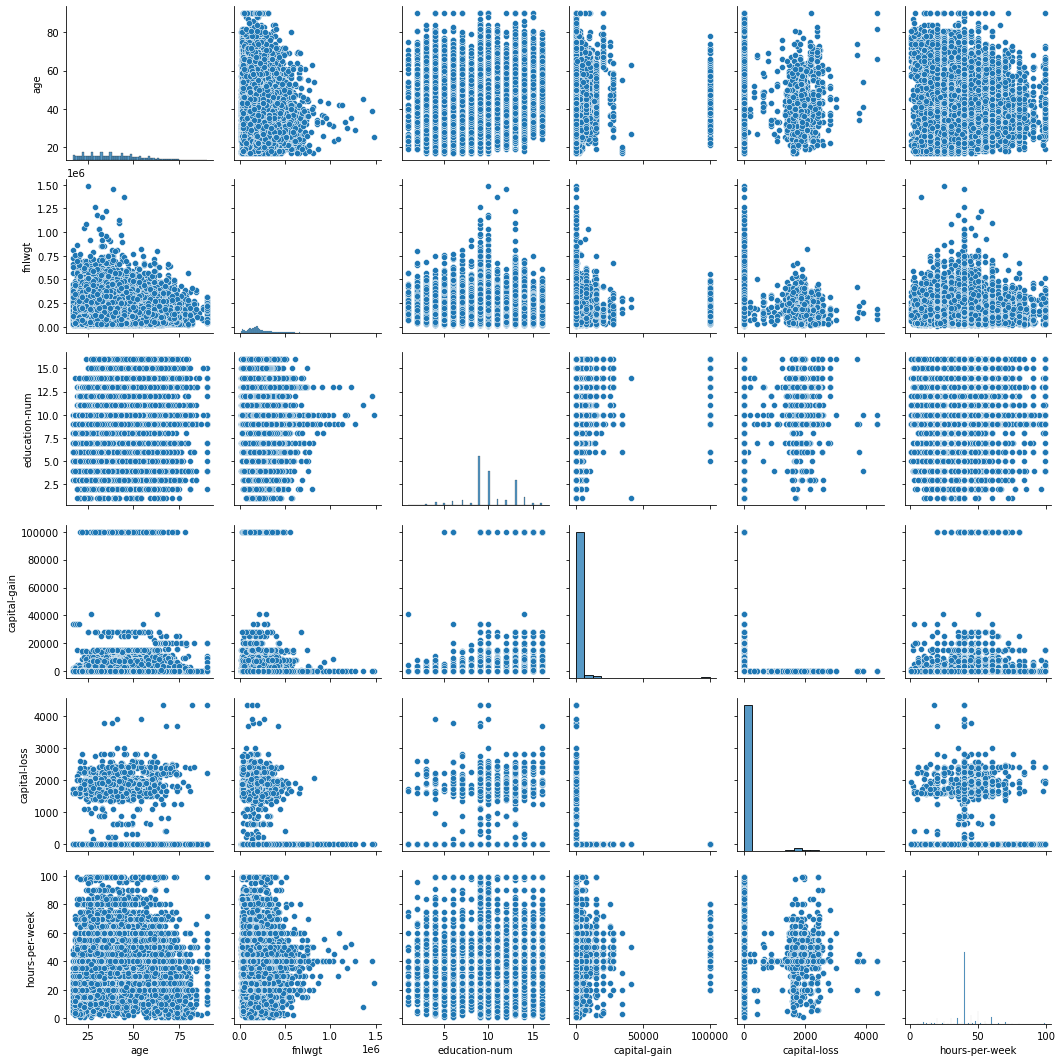

In [57]:
sns.pairplot(dataset)

According to above graphs (heatmap and scatter plots), it seems any two quantative variables doesn't have strong linear relationship.

## Two categorical variables 

Text(0.5, 1.0, 'workclass vs income')

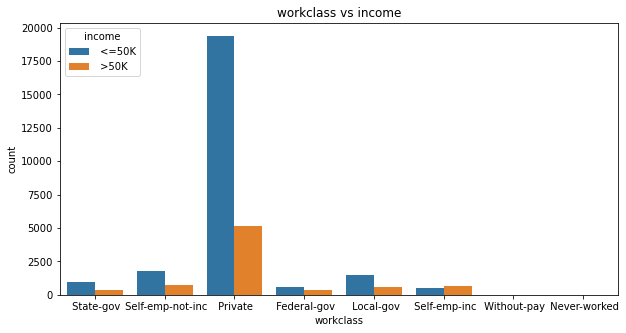

In [58]:
# workclass vs income
figure = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=dataset).set_title("workclass vs income")

Text(0.5, 1.0, 'marital-status vs income')

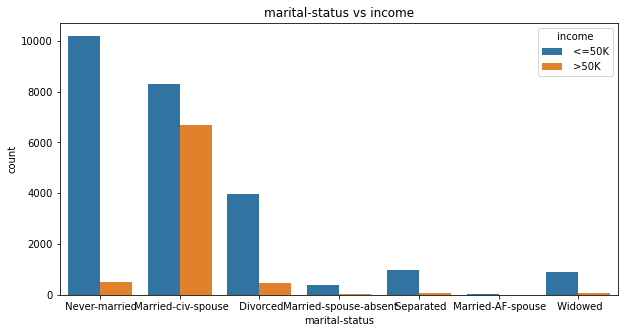

In [59]:
# marital-status vs income
figure = plt.figure(figsize=(10,5))
sns.countplot(x='marital-status',hue ='income',data=dataset).set_title("marital-status vs income")

Text(0.5, 1.0, 'relationship vs income')

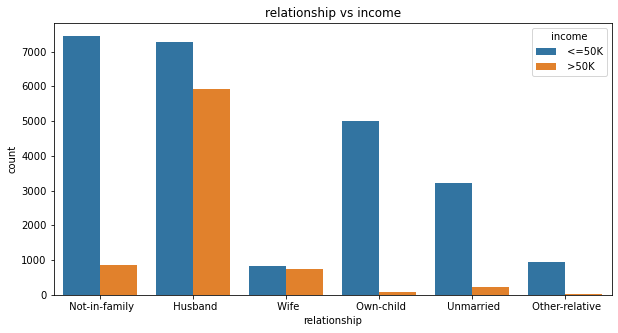

In [60]:
# relationship vs income
figure = plt.figure(figsize=(10,5))
sns.countplot(x='relationship',hue ='income',data=dataset).set_title("relationship vs income")

Text(0.5, 1.0, 'race vs income')

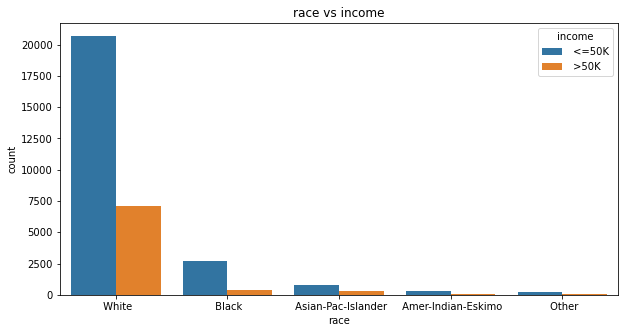

In [61]:
# race vs income
figure = plt.figure(figsize=(10,5))
sns.countplot(x='race',hue ='income',data=dataset).set_title("race vs income")

Text(0.5, 1.0, 'sex vs income')

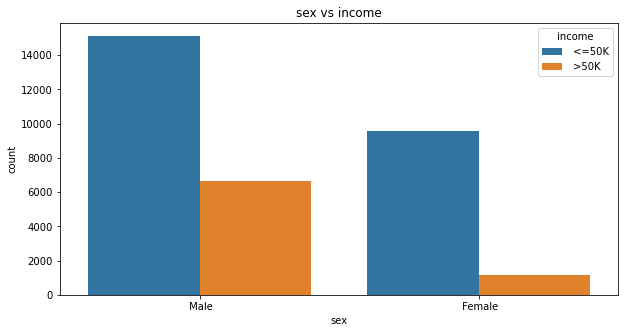

In [62]:
# sex vs income
figure = plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue ='income',data=dataset).set_title("sex vs income")

Text(0.5, 1.0, 'workclass vs sex')

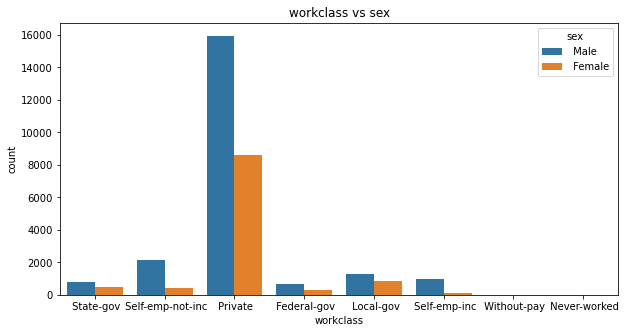

In [63]:
# workclass vs sex
figure = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='sex',data=dataset).set_title("workclass vs sex")

Text(0.5, 1.0, 'marital-status vs sex')

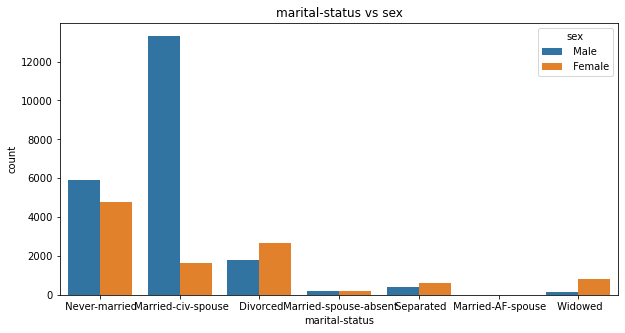

In [64]:
# marital-status vs sex
figure = plt.figure(figsize=(10,5))
sns.countplot(x='marital-status',hue ='sex',data=dataset).set_title("marital-status vs sex")

Text(0.5, 1.0, 'relationship vs sex')

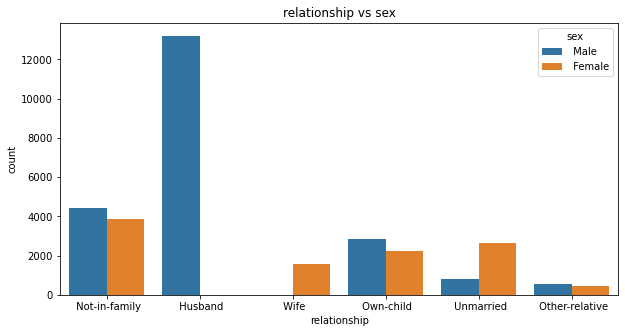

In [65]:
# relationship vs sex
figure = plt.figure(figsize=(10,5))
sns.countplot(x='relationship',hue ='sex',data=dataset).set_title("relationship vs sex")

Text(0.5, 1.0, 'race vs sex')

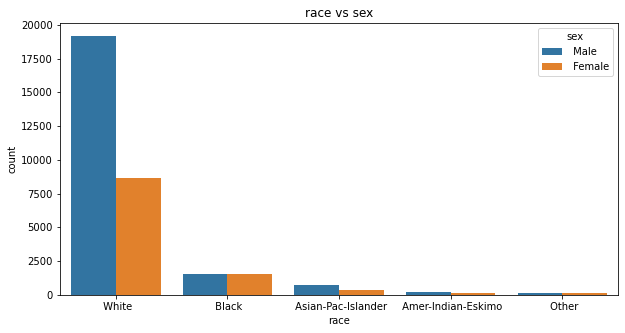

In [66]:
# race vs sex
figure = plt.figure(figsize=(10,5))
sns.countplot(x='race',hue ='sex',data=dataset).set_title("race vs sex")

## Numerical variable with categorical variable 

<AxesSubplot:xlabel='income', ylabel='age'>

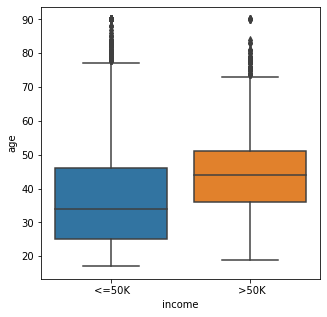

In [67]:
figure = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=dataset)

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

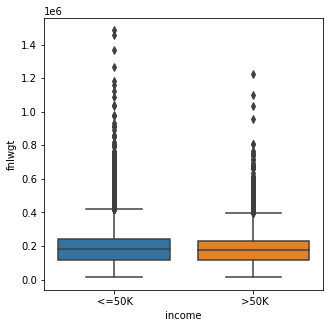

In [68]:
figure = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='fnlwgt',data=dataset)

<AxesSubplot:xlabel='income', ylabel='education-num'>

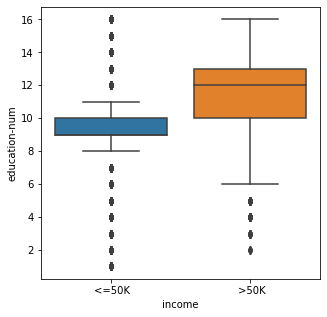

In [69]:
figure = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='education-num',data=dataset)

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

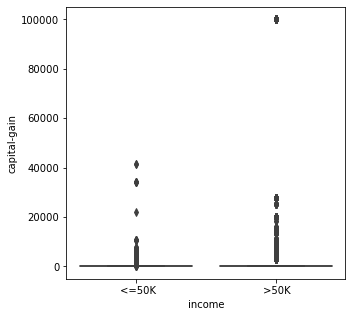

In [70]:
figure = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='capital-gain',data=dataset)

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

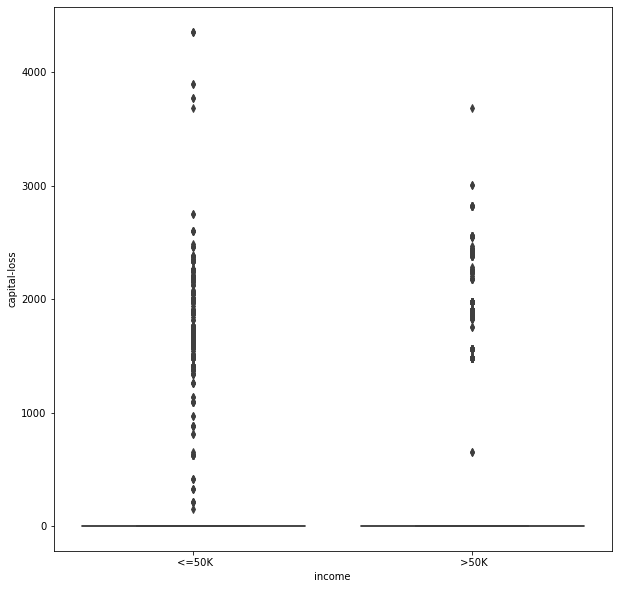

In [71]:
figure = plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='capital-loss',data=dataset)

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

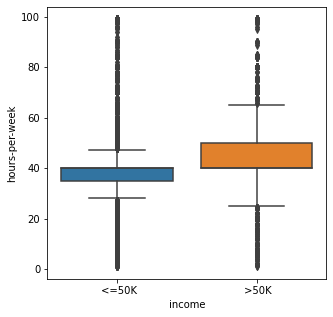

In [72]:
figure = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='hours-per-week',data=dataset)

# Multivariate Analysis

<Figure size 1440x360 with 0 Axes>

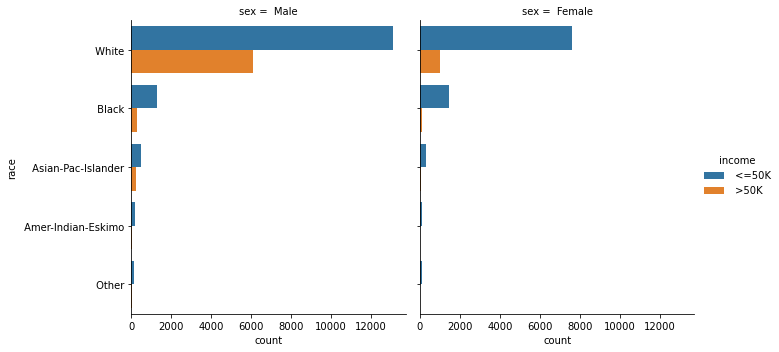

In [73]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="sex", data=dataset);

<Figure size 1440x360 with 0 Axes>

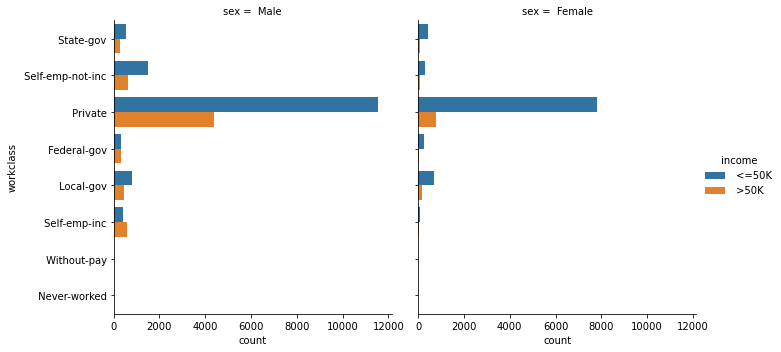

In [74]:
plt.figure(figsize=(20,5))
sns.catplot(y="workclass", hue="income", kind="count",col="sex", data=dataset);

<Figure size 1440x360 with 0 Axes>

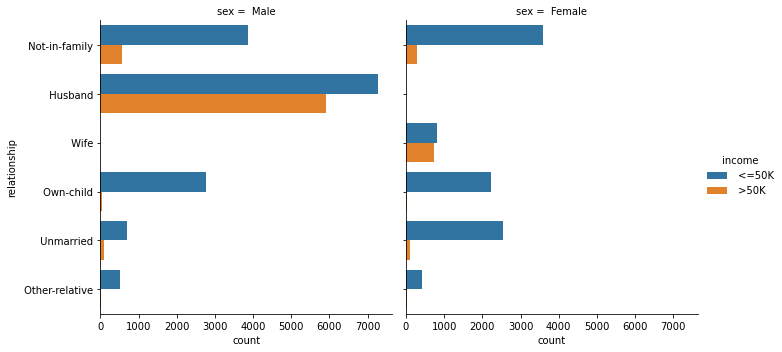

In [75]:
plt.figure(figsize=(20,5))
sns.catplot(y="relationship", hue="income", kind="count",col="sex", data=dataset);